In [1]:
import pandas as pd
from utilities.plotting import *
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from utilities.plotting import plot_feature_importance, partial_dependence_plot

pd.set_option('float_format', '{:.2f}'.format)

In [2]:
housing = pd.read_csv('../data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [5]:
housing.describe(exclude='number')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


## Análisis exploratorio

### Análisis univariado

#### Variable categorica

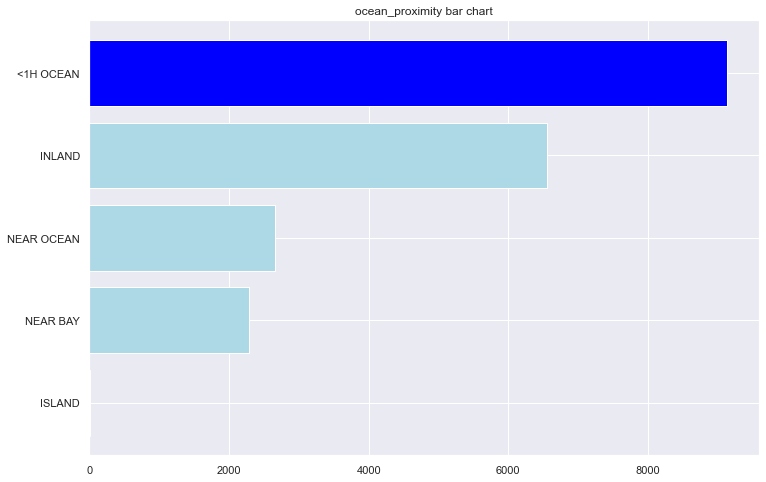

In [6]:
barplot(data=housing, column='ocean_proximity')

#### Numéricas

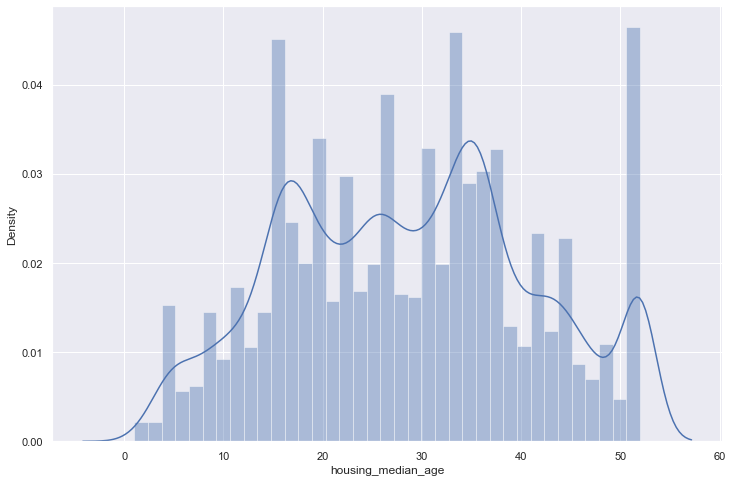

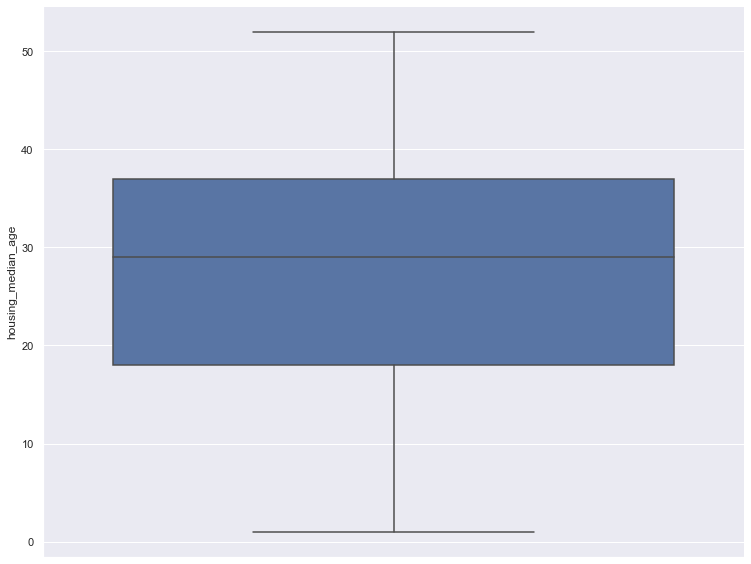

In [7]:
histogram(data=housing, column='housing_median_age')
boxplot(data=housing, column='housing_median_age')

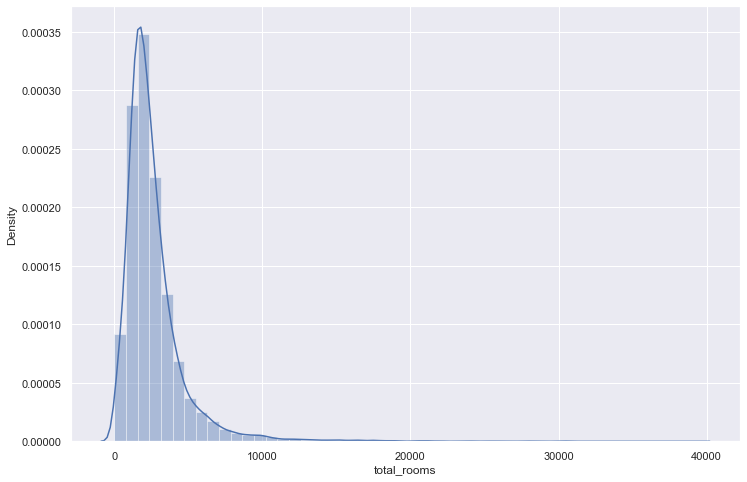

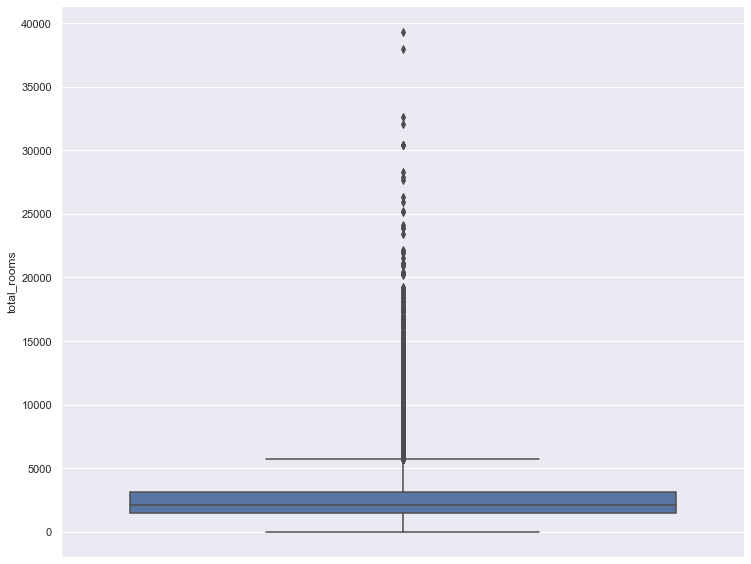

In [8]:
histogram(data=housing, column='total_rooms')
boxplot(data=housing, column='total_rooms')

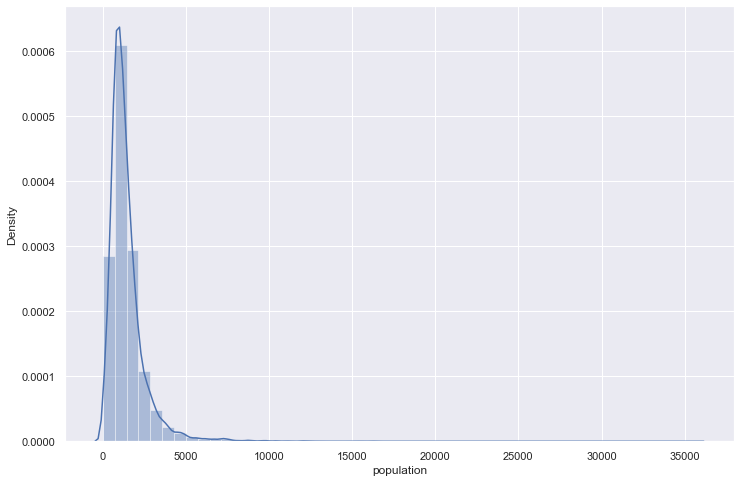

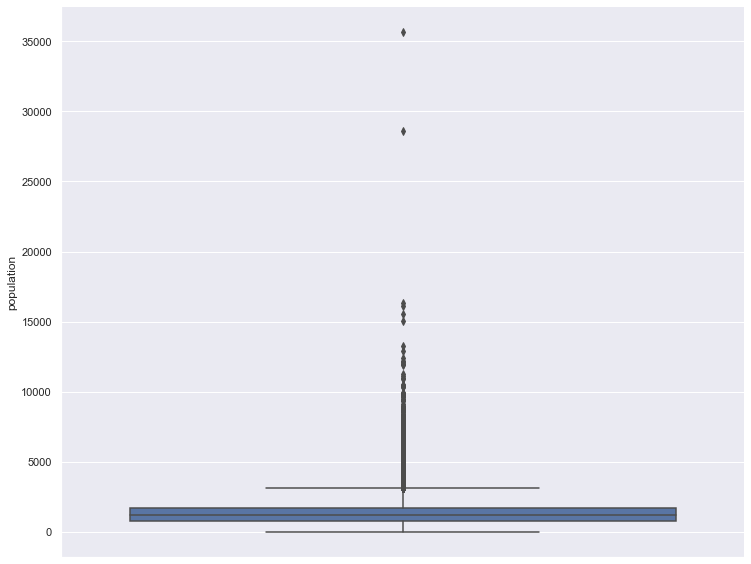

In [9]:
histogram(data=housing, column='population')
boxplot(data=housing, column='population')

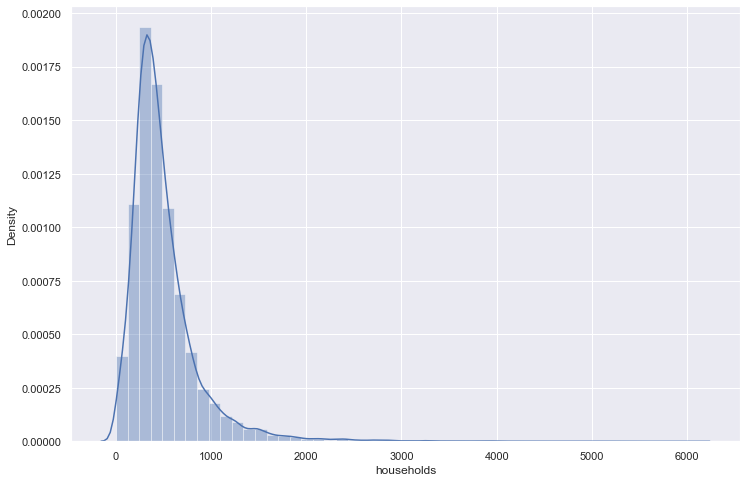

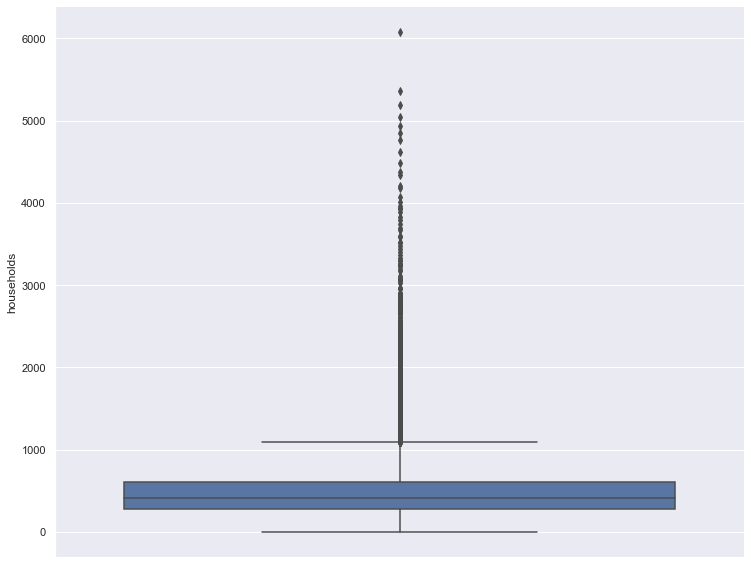

In [10]:
histogram(data=housing, column='households')
boxplot(data=housing, column='households')

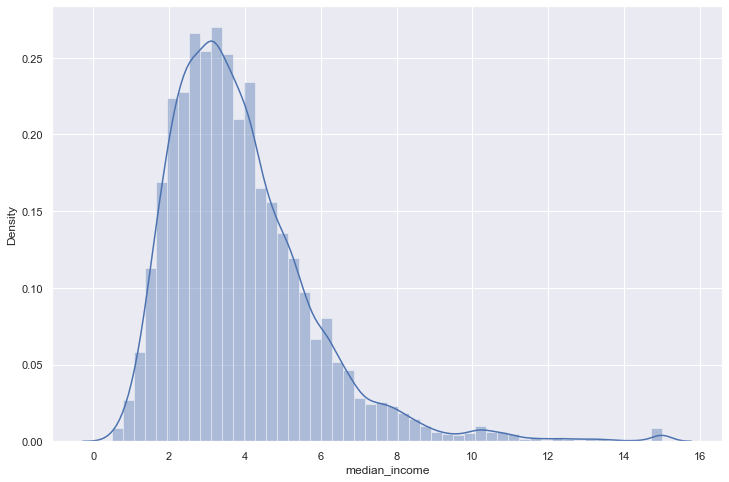

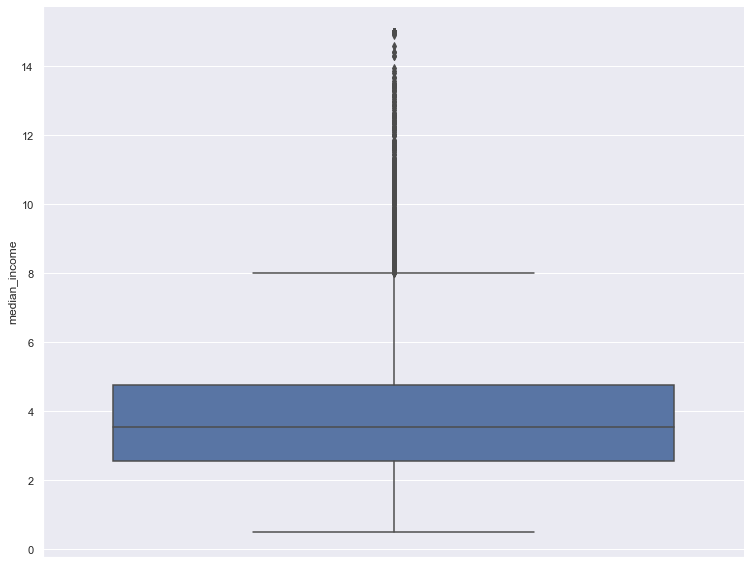

In [11]:
histogram(data=housing, column='median_income')
boxplot(data=housing, column='median_income')

### Análisis bivariado

#### Continua vs continua

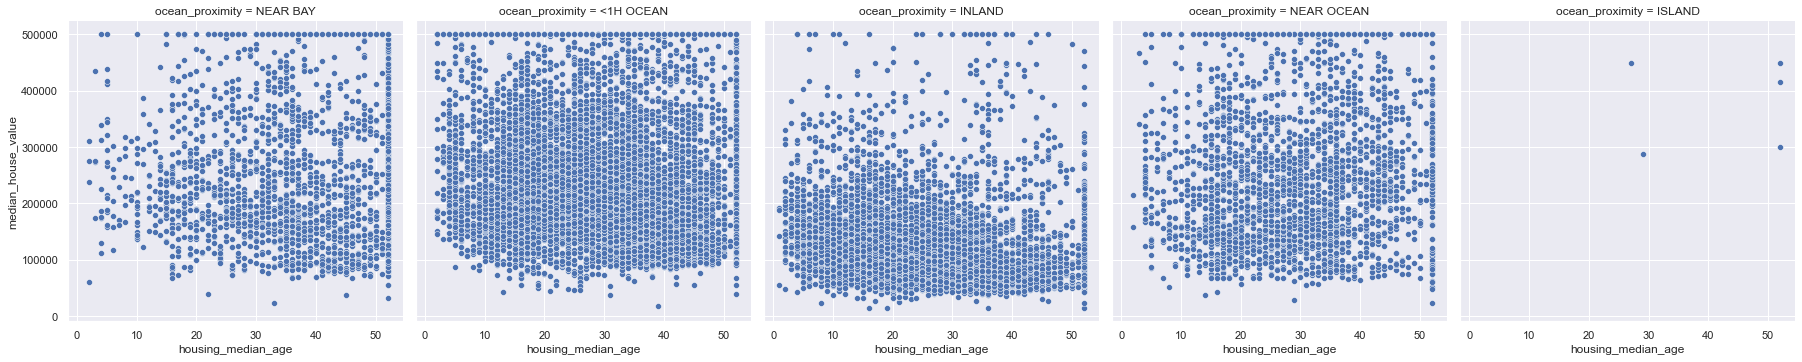

In [12]:
scatterplot(data=housing, x='housing_median_age', y='median_house_value', col='ocean_proximity')

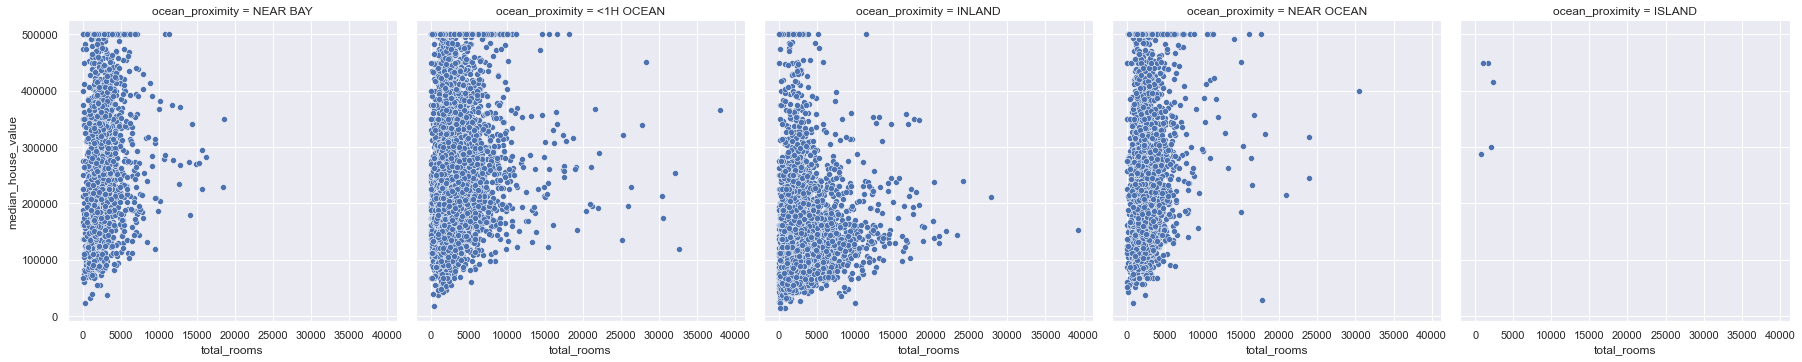

In [13]:
scatterplot(data=housing, x='total_rooms', y='median_house_value', col='ocean_proximity')

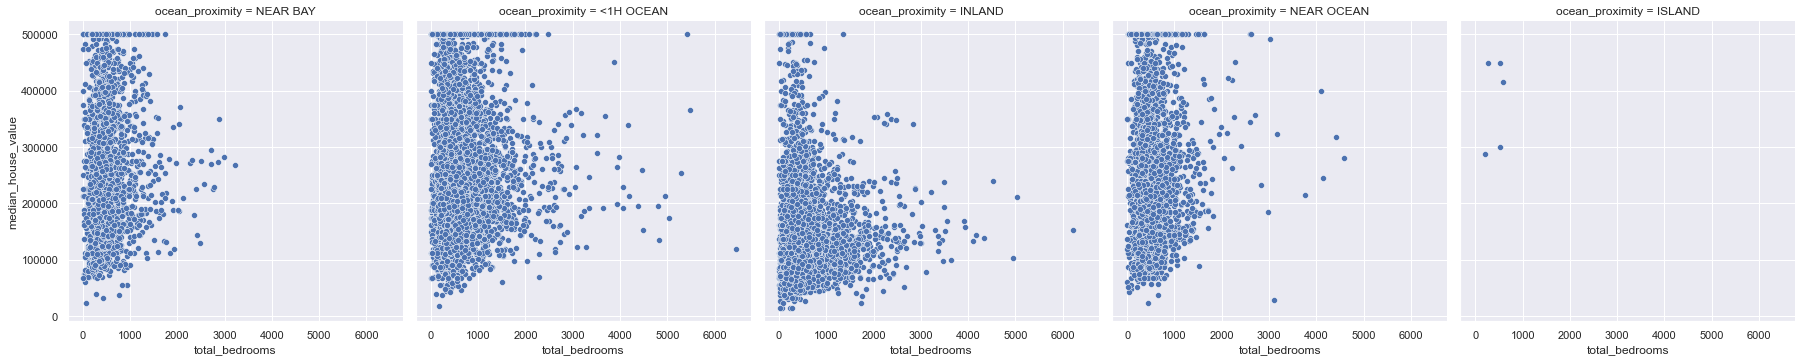

In [14]:
scatterplot(data=housing, x='total_bedrooms', y='median_house_value', col='ocean_proximity')

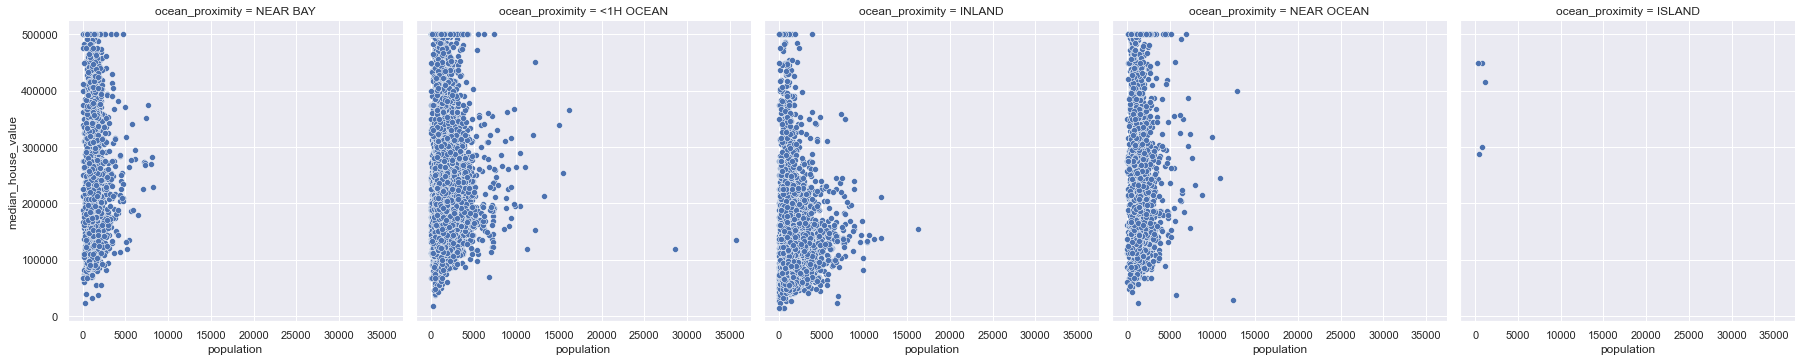

In [15]:
scatterplot(data=housing, x='population', y='median_house_value', col='ocean_proximity')

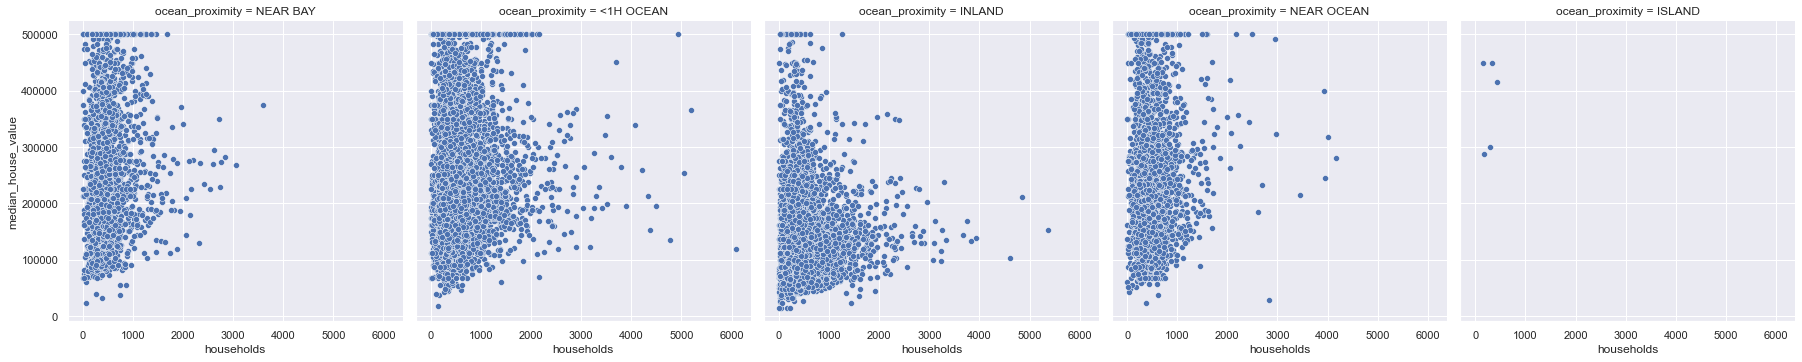

In [16]:
scatterplot(data=housing, x='households', y='median_house_value', col='ocean_proximity')

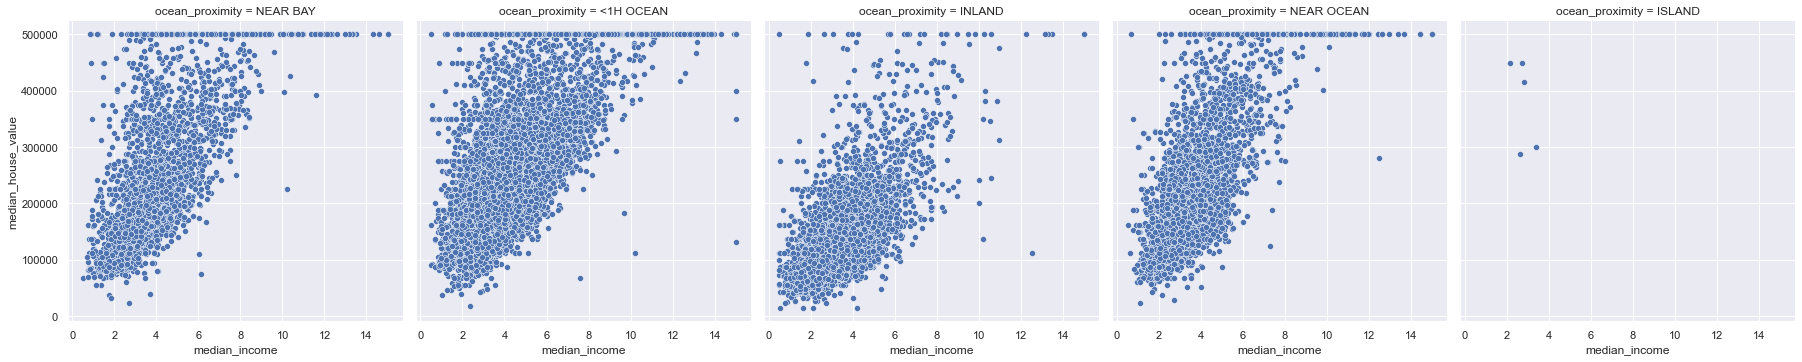

In [17]:
scatterplot(data=housing, x='median_income', y='median_house_value', col='ocean_proximity')

#### Categorica vs continua

* ocean_proximity vs median_house_value

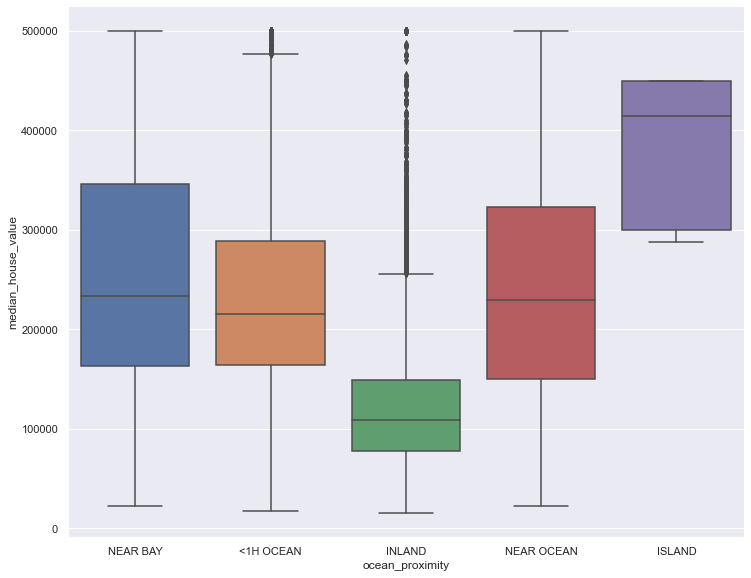

In [18]:
boxplot(data=housing, column='ocean_proximity', label='median_house_value')

### Análisis multivariado

#### Clustering

In [19]:
numerical_features = ['housing_median_age', 'total_rooms',
                      'total_bedrooms', 'population', 'households', 'median_income',
                      'median_house_value']

categorical_features = ['ocean_proximity']

In [20]:
housing.isna().mean()

longitude            0.00
latitude             0.00
housing_median_age   0.00
total_rooms          0.00
total_bedrooms       0.01
population           0.00
households           0.00
median_income        0.00
median_house_value   0.00
ocean_proximity      0.00
dtype: float64

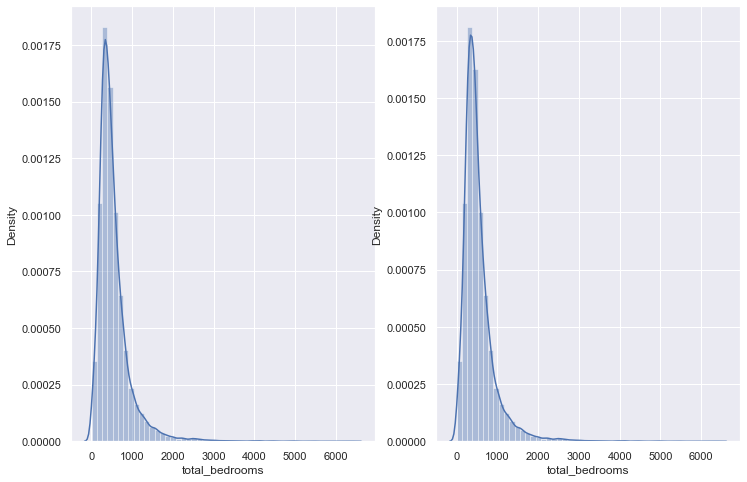

In [21]:
plot_imputations(df=housing, column='total_bedrooms', method='median')

In [22]:
imputer = SimpleImputer(strategy='median')
scaler = RobustScaler()

X = imputer.fit_transform(housing[numerical_features])
X = pd.DataFrame(scaler.fit_transform(X), columns=numerical_features)

X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.63,-0.73,-0.88,-0.90,-0.87,2.20,1.88
1,-0.42,2.92,1.94,1.32,2.24,2.19,1.23
2,1.21,-0.39,-0.71,-0.71,-0.71,1.71,1.19
3,1.21,-0.50,-0.58,-0.65,-0.58,0.97,1.11
4,1.21,-0.29,-0.45,-0.64,-0.46,0.14,1.12


In [23]:
clusters = np.linspace(start=2, stop=20, num=10, dtype=int)

models = [GaussianMixture(n_components=n, random_state=42).fit(X) for n in clusters]
models

[GaussianMixture(n_components=2, random_state=42),
 GaussianMixture(n_components=4, random_state=42),
 GaussianMixture(n_components=6, random_state=42),
 GaussianMixture(n_components=8, random_state=42),
 GaussianMixture(n_components=10, random_state=42),
 GaussianMixture(n_components=12, random_state=42),
 GaussianMixture(n_components=14, random_state=42),
 GaussianMixture(n_components=16, random_state=42),
 GaussianMixture(n_components=18, random_state=42),
 GaussianMixture(n_components=20, random_state=42)]

In [24]:
aic = [model.aic(X) for model in models]
bic = [model.bic(X) for model in models]

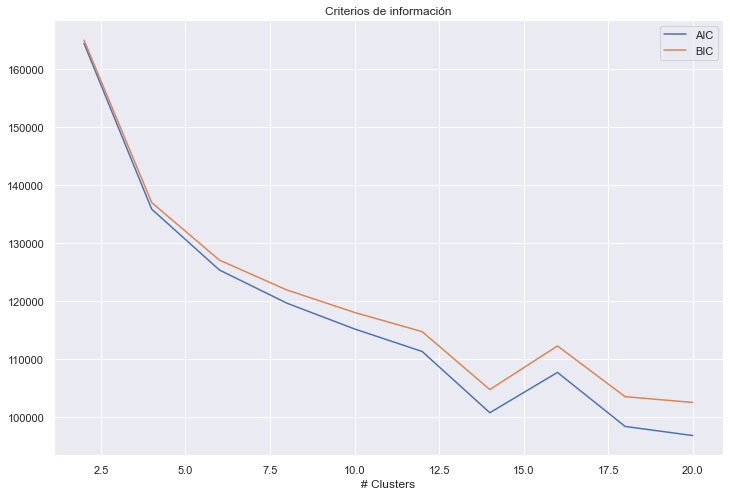

In [25]:
plt.plot(clusters, aic, label='AIC')
plt.plot(clusters, bic, label='BIC')
plt.legend(loc='best')
plt.title('Criterios de información')
plt.xlabel('# Clusters')
plt.show()

In [26]:
gmm = GaussianMixture(n_components=14, random_state=42).fit(X)

X['cluster'] = pd.Series(gmm.predict(X)).apply(lambda x: f'cluster_{int(x + 1)}')

X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster
0,0.63,-0.73,-0.88,-0.90,-0.87,2.20,1.88,cluster_1
1,-0.42,2.92,1.94,1.32,2.24,2.19,1.23,cluster_7
2,1.21,-0.39,-0.71,-0.71,-0.71,1.71,1.19,cluster_8
3,1.21,-0.50,-0.58,-0.65,-0.58,0.97,1.11,cluster_8
4,1.21,-0.29,-0.45,-0.64,-0.46,0.14,1.12,cluster_8


In [27]:
X[numerical_features] = scaler.inverse_transform(X[numerical_features])

X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster
0,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,cluster_1
1,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,cluster_7
2,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,cluster_8
3,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,cluster_8
4,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,cluster_8


In [28]:
X.groupby(by='cluster', as_index=False).mean().style.background_gradient(cmap='Blues')

,cluster,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,cluster_1,31.389325,652.796703,121.891680,337.545526,118.039246,3.844728,180862.243328
1,cluster_10,38.043860,1506.623839,318.526058,1006.737616,307.247162,3.022488,134489.060888
2,cluster_11,32.777399,2005.199708,467.483682,996.216756,438.992207,3.332104,270279.590843
3,cluster_12,20.490985,1934.645631,384.508322,953.922330,349.202497,2.768915,95984.049931
4,cluster_13,34.461538,2664.205495,435.130769,980.847253,408.270330,7.911635,500000.974725
5,cluster_14,21.638056,4457.133402,1082.105481,3118.975181,1010.112720,2.725590,151063.598759
6,cluster_2,11.560703,8031.605431,1473.774760,3799.715655,1364.255591,4.754486,214275.094249
7,cluster_3,27.863477,3575.667445,939.740957,1829.754959,854.296383,3.172832,301844.619603
8,cluster_4,21.728700,2626.874439,582.576233,831.757848,328.017937,3.029559,125686.766816
9,cluster_5,15.425532,12743.340426,2712.409574,7120.351064,2447.707447,3.762561,203722.356383


In [29]:
X.groupby(by='cluster', as_index=False).std()

,cluster,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,cluster_1,12.80,403.51,69.48,192.82,68.43,1.84,89527.50
1,cluster_10,8.04,513.15,93.58,312.51,89.73,1.06,51487.06
2,cluster_11,12.46,751.79,156.71,333.30,150.17,1.02,91710.13
3,cluster_12,7.52,778.66,142.52,409.28,140.91,0.82,28518.80
4,cluster_13,12.88,1595.97,256.14,560.97,237.14,3.22,0.16
5,cluster_14,8.54,1538.39,278.82,929.15,267.40,0.78,50174.60
6,cluster_2,6.41,3376.50,520.29,1649.75,512.99,1.46,88940.96
7,cluster_3,12.77,1459.09,360.18,627.85,348.31,0.99,100120.67
8,cluster_4,10.79,1294.37,231.18,474.67,190.77,1.04,48818.03
9,cluster_5,11.32,7293.32,1089.53,3818.35,1038.78,1.50,95064.06


In [30]:
price = housing.pop('median_house_value')
housing = housing.drop(labels=['longitude', 'latitude'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(housing, price, test_size=0.3)

In [31]:
zscore_features = ['housing_median_age']
iqr_features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

#### Outliers con Z-Score

In [32]:
scaler = StandardScaler()

X_train[zscore_features] = scaler.fit_transform(X_train[zscore_features])

dummy_zscore = lambda x: 1 if x > 3 else (1 if x < -3 else 0)

for feature in zscore_features:
    X_train[f'{feature}_ind'] = X_train[feature].apply(dummy_zscore)

X_train[zscore_features] = scaler.inverse_transform(X_train[zscore_features])
X_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,housing_median_age_ind
14281,44.00,1697.00,413.00,1396.00,363.00,1.55,NEAR OCEAN,0
20456,10.00,1658.00,310.00,1053.00,333.00,4.76,<1H OCEAN,0
2398,19.00,1616.00,324.00,187.00,80.00,3.79,INLAND,0
5242,32.00,5578.00,753.00,1567.00,697.00,15.00,<1H OCEAN,0
9616,12.00,2855.00,598.00,1658.00,586.00,2.39,INLAND,0


In [33]:
X_train['housing_median_age_ind'].value_counts()

0    14448
Name: housing_median_age_ind, dtype: int64

In [34]:
X_test[zscore_features] = scaler.transform(X_test[zscore_features])

dummy_zscore = lambda x: 1 if x > 3 else (1 if x < -3 else 0)

for feature in zscore_features:
    X_test[f'{feature}_ind'] = X_test[feature].apply(dummy_zscore)

X_test[zscore_features] = scaler.inverse_transform(X_test[zscore_features])
X_test.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,housing_median_age_ind
11806,16.00,2069.00,312.00,889.00,299.00,4.68,INLAND,0
16164,52.00,2299.00,441.00,1252.00,415.00,5.06,NEAR BAY,0
10994,24.00,845.00,190.00,482.00,190.00,4.70,<1H OCEAN,0
15332,15.00,4784.00,1039.00,1810.00,986.00,2.44,NEAR OCEAN,0
3490,23.00,1663.00,302.00,1242.00,283.00,5.59,<1H OCEAN,0


In [35]:
X_test['housing_median_age_ind'].value_counts()

0    6192
Name: housing_median_age_ind, dtype: int64

#### Outliers con IQR

In [36]:
q3 = X_train[iqr_features].quantile(0.75).to_dict()
q1 = X_train[iqr_features].quantile(0.25).to_dict()

iqr = dict(Counter(q3) - Counter(q1))

print(q3)
print(q1)
print(iqr)

{'total_rooms': 3146.0, 'total_bedrooms': 648.0, 'population': 1721.0, 'households': 606.0, 'median_income': 4.763225}
{'total_rooms': 1445.0, 'total_bedrooms': 295.0, 'population': 787.0, 'households': 280.0, 'median_income': 2.5732000000000004}
{'total_rooms': 1701.0, 'total_bedrooms': 353.0, 'population': 934.0, 'households': 326.0, 'median_income': 2.190025}


In [37]:
for feature in set(q3.keys()) & set(q1.keys()) & set(iqr.keys()):
    X_train[f'{feature}_ind'] = X_train[feature].apply(lambda x: 1 if x > q3[feature] + 1.5 * iqr[feature] else
                                                       (1 if x < q1[feature] - 1.5 * iqr[feature] else 0))

ind_features = [column for column in X_train.columns if column.endswith('ind')]

X_train['sum_outliers'] = X_train[ind_features].sum(axis=1)

X_train.head().append(X_train.tail())

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,housing_median_age_ind,total_rooms_ind,median_income_ind,total_bedrooms_ind,households_ind,population_ind,sum_outliers
14281,44.00,1697.00,413.00,1396.00,363.00,1.55,NEAR OCEAN,0,0,0,0,0,0,0
20456,10.00,1658.00,310.00,1053.00,333.00,4.76,<1H OCEAN,0,0,0,0,0,0,0
2398,19.00,1616.00,324.00,187.00,80.00,3.79,INLAND,0,0,0,0,0,0,0
5242,32.00,5578.00,753.00,1567.00,697.00,15.00,<1H OCEAN,0,0,1,0,0,0,1
9616,12.00,2855.00,598.00,1658.00,586.00,2.39,INLAND,0,0,0,0,0,0,0
12849,38.00,300.00,47.00,154.00,51.00,4.09,INLAND,0,0,0,0,0,0,0
3291,16.00,3715.00,810.00,943.00,510.00,1.74,INLAND,0,0,0,0,0,0,0
2873,41.00,1463.00,339.00,1066.00,318.00,1.75,INLAND,0,0,0,0,0,0,0
18032,19.00,1741.00,294.00,632.00,279.00,5.59,<1H OCEAN,0,0,0,0,0,0,0
16080,52.00,2442.00,449.00,1188.00,436.00,4.39,NEAR OCEAN,0,0,0,0,0,0,0


In [38]:
for feature in set(q3.keys()) & set(q1.keys()) & set(iqr.keys()):
    X_test[f'{feature}_ind'] = X_test[feature].apply(lambda x: 1 if x > q3[feature] + 1.5 * iqr[feature] else
                                                    (1 if x < q1[feature] - 1.5 * iqr[feature] else 0))

X_test['sum_outliers'] = X_test[ind_features].sum(axis=1)

X_test.head().append(X_test.tail())

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,housing_median_age_ind,total_rooms_ind,median_income_ind,total_bedrooms_ind,households_ind,population_ind,sum_outliers
11806,16.00,2069.00,312.00,889.00,299.00,4.68,INLAND,0,0,0,0,0,0,0
16164,52.00,2299.00,441.00,1252.00,415.00,5.06,NEAR BAY,0,0,0,0,0,0,0
10994,24.00,845.00,190.00,482.00,190.00,4.70,<1H OCEAN,0,0,0,0,0,0,0
15332,15.00,4784.00,1039.00,1810.00,986.00,2.44,NEAR OCEAN,0,0,0,0,0,0,0
3490,23.00,1663.00,302.00,1242.00,283.00,5.59,<1H OCEAN,0,0,0,0,0,0,0
1333,4.00,4075.00,927.00,2239.00,849.00,3.59,INLAND,0,0,0,0,0,0,0
17333,12.00,3189.00,463.00,1200.00,442.00,5.30,<1H OCEAN,0,0,0,0,0,0,0
10143,19.00,2176.00,414.00,1002.00,402.00,4.97,<1H OCEAN,0,0,0,0,0,0,0
444,49.00,2026.00,548.00,963.00,521.00,1.98,NEAR BAY,0,0,0,0,0,0,0
18875,4.00,15654.00,2394.00,7025.00,2168.00,5.82,NEAR BAY,0,1,0,1,1,1,4


In [39]:
X_train['households_ind'].value_counts(normalize=True)

0   0.94
1   0.06
Name: households_ind, dtype: float64

In [40]:
indices = X_train[X_train['households_ind'] == 1].index.tolist()

In [41]:
# Eliminar o hacerlo missing e imputarlo

# X_train.drop(indices, axis=0)
#
# X_train.loc[indices, 'households'] = np.nan

### Imputación de valores missing

In [42]:
imputer = X_train.groupby(by='total_rooms', as_index=False)['total_bedrooms'].median()

for index, row in imputer.iterrows():
    aux = dict(row)
    X_train.loc[(X_train['total_rooms'] == aux['total_rooms']) &
                (X_train['total_bedrooms'].isna()), 'total_bedrooms'] = aux['total_bedrooms']

X_train.isna().sum()

housing_median_age         0
total_rooms                0
total_bedrooms            23
population                 0
households                 0
median_income              0
ocean_proximity            0
housing_median_age_ind     0
total_rooms_ind            0
median_income_ind          0
total_bedrooms_ind         0
households_ind             0
population_ind             0
sum_outliers               0
dtype: int64

In [43]:
for index, row in imputer.iterrows():
    aux = dict(row)
    X_test.loc[(X_test['total_rooms'] == aux['total_rooms']) &
               (X_test['total_bedrooms'].isna()), 'total_bedrooms'] = aux['total_bedrooms']

X_test.isna().sum()

housing_median_age        0
total_rooms               0
total_bedrooms            5
population                0
households                0
median_income             0
ocean_proximity           0
housing_median_age_ind    0
total_rooms_ind           0
median_income_ind         0
total_bedrooms_ind        0
households_ind            0
population_ind            0
sum_outliers              0
dtype: int64

In [44]:
numerical_features.remove('median_house_value')

In [45]:
imputer = SimpleImputer(strategy='median')

X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = imputer.transform(X_test[numerical_features])

### Escalar los datos

In [46]:
scaler = RobustScaler()

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

X_train.drop(labels='sum_outliers', axis=1, inplace=True)
X_test.drop(labels='sum_outliers', axis=1, inplace=True)

### Codificar las variables categorícas

In [47]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(X_train[categorical_features])

ohe_features = [f'ocean_proximity_{feature.split("_")[1]}' for feature in ohe.get_feature_names()]

ohe_df = pd.DataFrame(ohe.transform(X_train[categorical_features]), columns=ohe_features)

X_train.drop(labels=categorical_features, axis=1, inplace=True)

X_train = pd.concat(objs=[X_train.reset_index(drop=True), ohe_df], axis=1)
X_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,housing_median_age_ind,total_rooms_ind,median_income_ind,total_bedrooms_ind,households_ind,population_ind,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.79,-0.25,-0.05,0.25,-0.14,-0.91,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00
1,-1.00,-0.28,-0.35,-0.12,-0.23,0.56,0,0,0,0,0,0,1.00,0.00,0.00,0.00,0.00
2,-0.53,-0.30,-0.31,-1.04,-1.01,0.11,0,0,0,0,0,0,0.00,1.00,0.00,0.00,0.00
3,0.16,2.03,0.91,0.43,0.89,5.23,0,0,1,0,0,0,1.00,0.00,0.00,0.00,0.00
4,-0.89,0.43,0.47,0.53,0.55,-0.52,0,0,0,0,0,0,0.00,1.00,0.00,0.00,0.00


In [48]:
ohe_df = pd.DataFrame(ohe.transform(X_test[categorical_features]), columns=ohe_features)

X_test.drop(labels=categorical_features, axis=1, inplace=True)

X_test = pd.concat(objs=[X_test.reset_index(drop=True), ohe_df], axis=1)
X_test.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,housing_median_age_ind,total_rooms_ind,median_income_ind,total_bedrooms_ind,households_ind,population_ind,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.68,-0.03,-0.34,-0.29,-0.33,0.52,0,0,0,0,0,0,0.00,1.00,0.00,0.00,0.00
1,1.21,0.10,0.03,0.10,0.02,0.69,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00
2,-0.26,-0.75,-0.69,-0.73,-0.67,0.53,0,0,0,0,0,0,1.00,0.00,0.00,0.00,0.00
3,-0.74,1.56,1.72,0.69,1.77,-0.50,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00
4,-0.32,-0.27,-0.37,0.08,-0.38,0.94,0,0,0,0,0,0,1.00,0.00,0.00,0.00,0.00


### Interacción de características

In [49]:
for i in ['median_income']:
    for j in ohe_features:
        X_train[f'{i}_{j}'] = X_train[i] * X_train[j]

X_train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,housing_median_age_ind,total_rooms_ind,median_income_ind,total_bedrooms_ind,...,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_income_ocean_proximity_<1H OCEAN,median_income_ocean_proximity_INLAND,median_income_ocean_proximity_ISLAND,median_income_ocean_proximity_NEAR BAY,median_income_ocean_proximity_NEAR OCEAN
0,0.79,-0.25,-0.05,0.25,-0.14,-0.91,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.91
1,-1.00,-0.28,-0.35,-0.12,-0.23,0.56,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00
2,-0.53,-0.30,-0.31,-1.04,-1.01,0.11,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,0.00,0.11,0.00,0.00,0.00
3,0.16,2.03,0.91,0.43,0.89,5.23,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,5.23,0.00,0.00,0.00,0.00
4,-0.89,0.43,0.47,0.53,0.55,-0.52,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,-0.00,-0.52,-0.00,-0.00,-0.00


In [50]:
for i in ['median_income']:
    for j in ohe_features:
        X_test[f'{i}_{j}'] = X_test[i] * X_test[j]

X_test.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,housing_median_age_ind,total_rooms_ind,median_income_ind,total_bedrooms_ind,...,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_income_ocean_proximity_<1H OCEAN,median_income_ocean_proximity_INLAND,median_income_ocean_proximity_ISLAND,median_income_ocean_proximity_NEAR BAY,median_income_ocean_proximity_NEAR OCEAN
0,-0.68,-0.03,-0.34,-0.29,-0.33,0.52,0,0,0,0,...,0.00,1.00,0.00,0.00,0.00,0.00,0.52,0.00,0.00,0.00
1,1.21,0.10,0.03,0.10,0.02,0.69,0,0,0,0,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.69,0.00
2,-0.26,-0.75,-0.69,-0.73,-0.67,0.53,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00
3,-0.74,1.56,1.72,0.69,1.77,-0.50,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.50
4,-0.32,-0.27,-0.37,0.08,-0.38,0.94,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.94,0.00,0.00,0.00,0.00


### Validación cruzada

In [51]:
rl = LinearRegression(n_jobs=-1)
dtree = DecisionTreeRegressor(max_depth=4, random_state=42)
rf = RandomForestRegressor(n_estimators=50, max_depth=4, max_features='sqrt', random_state=42)
gb = GradientBoostingRegressor(n_estimators=50, max_depth=4, learning_rate=0.08, subsample=0.7, max_features='sqrt')

In [52]:
rmse = {}
mae = {}

rmse['linear_regression'] = np.sqrt(-cross_val_score(estimator=rl, X=X_train, y=y_train,
                                                     scoring='neg_mean_squared_error', cv=5, n_jobs=-1))

rmse['decision_tree'] = np.sqrt(-cross_val_score(estimator=dtree, X=X_train, y=y_train,
                                                     scoring='neg_mean_squared_error', cv=5, n_jobs=-1))

rmse['random_forest'] = np.sqrt(-cross_val_score(estimator=rf, X=X_train, y=y_train,
                                                     scoring='neg_mean_squared_error', cv=5, n_jobs=-1))

rmse['gradient_boosting'] = np.sqrt(-cross_val_score(estimator=gb, X=X_train, y=y_train,
                                                     scoring='neg_mean_squared_error', cv=5, n_jobs=-1))

mae['linear_regression'] = np.sqrt(-cross_val_score(estimator=rl, X=X_train, y=y_train,
                                                     scoring='neg_mean_absolute_error', cv=5, n_jobs=-1))

mae['decision_tree'] = np.sqrt(-cross_val_score(estimator=dtree, X=X_train, y=y_train,
                                                     scoring='neg_mean_absolute_error', cv=5, n_jobs=-1))

mae['random_forest'] = np.sqrt(-cross_val_score(estimator=rf, X=X_train, y=y_train,
                                                     scoring='neg_mean_absolute_error', cv=5, n_jobs=-1))

mae['gradient_boosting'] = np.sqrt(-cross_val_score(estimator=gb, X=X_train, y=y_train,
                                                     scoring='neg_mean_absolute_error', cv=5, n_jobs=-1))

In [53]:
rmse = pd.DataFrame.from_dict(rmse)
mae = pd.DataFrame.from_dict(mae)

In [54]:
resultados = pd.concat(objs=[pd.DataFrame(rmse.mean(), columns=['rmse']),
                             pd.DataFrame(mae.mean(), columns=['mae']),
                             pd.DataFrame(rmse.std(), columns=['rmse_std']),
                             pd.DataFrame(mae.std(), columns=['mae_std'])], axis=1)

resultados

,rmse,mae,rmse_std,mae_std
linear_regression,130920034895183.45,981937.06,185408423817506.53,1356180.27
decision_tree,73630.50,230.56,1742.73,2.44
random_forest,76238.45,238.76,1482.81,1.68
gradient_boosting,68352.26,222.34,1580.84,1.43


### Optimización de hiperparámetros

In [55]:
param_grid = {
    'loss': ['ls', 'lad', 'huber'],
    'n_estimators': [50, 100, 150],
    'criterion': ['friedman_mse', 'mse'],
    'subsample': [0.5, 0.7, 1.0],
    'max_features': [None, 'sqrt']
}

gb_cv = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

gb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.08,
                                                 max_depth=4,
                                                 max_features='sqrt',
                                                 n_estimators=50,
                                                 subsample=0.7),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'loss': ['ls', 'lad', 'huber'],
                         'max_features': [None, 'sqrt'],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='neg_mean_absolute_error')

In [56]:
print(f'Los mejores hiperparametros son: \n')
for key, value in gb_cv.best_params_.items():
    print(f'{key}: {value}')
print(f'El error absoluto medio más bajo es: {np.round(-gb_cv.best_score_, 2)}')

Los mejores hiperparametros son: 

criterion: mse
loss: huber
max_features: None
n_estimators: 150
subsample: 0.5
El error absoluto medio más bajo es: 43269.92


In [57]:
model = gb_cv.best_estimator_

### Evaluación del modelo

In [58]:
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_train, model.predict(X_train)))}')
print(f'El MAE es: {mean_absolute_error(y_train, model.predict(X_train))}')

El RMSE es: 57167.5990979806
El MAE es: 39795.408242167396


In [59]:
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')
print(f'El MAE es: {mean_absolute_error(y_test, model.predict(X_test))}')

El RMSE es: 60979.10070656017
El MAE es: 42276.769338198494


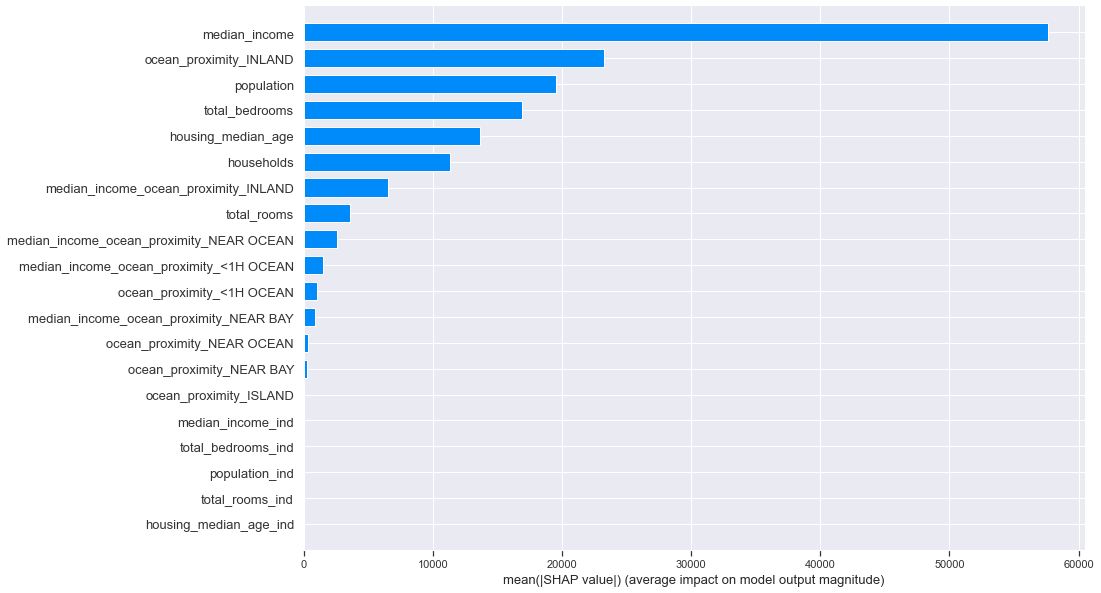

In [60]:
plot_feature_importance(model=model, data=X_test)

In [61]:
X_test[numerical_features] = scaler.inverse_transform(X_test[numerical_features])

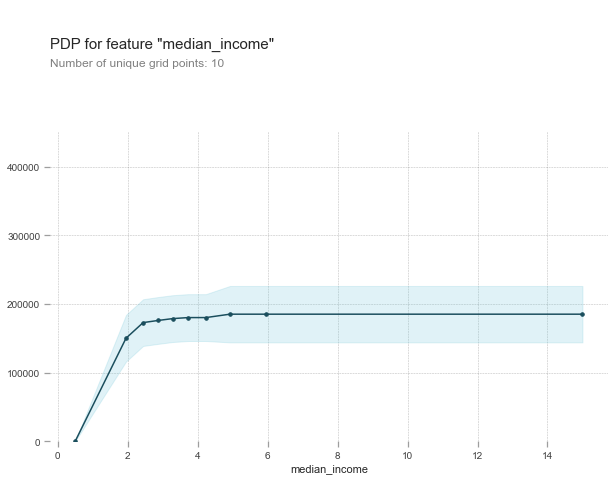

In [62]:
partial_dependence_plot(model=model, dataset=X_test, model_features=X_train.columns, objective='median_income')

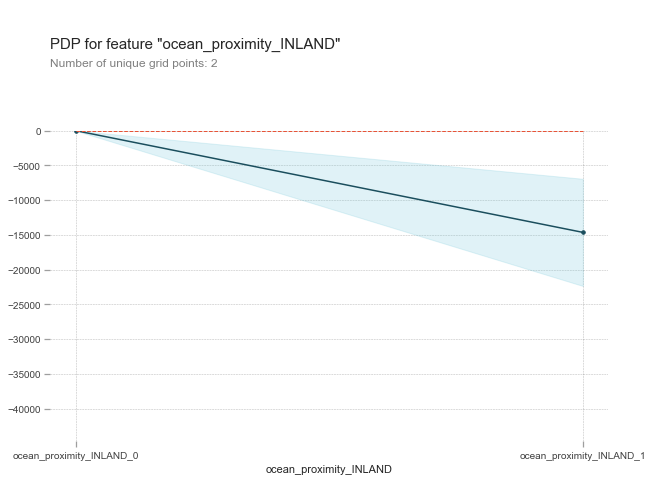

In [63]:
partial_dependence_plot(model=model, dataset=X_test, model_features=X_train.columns, objective='ocean_proximity_INLAND')

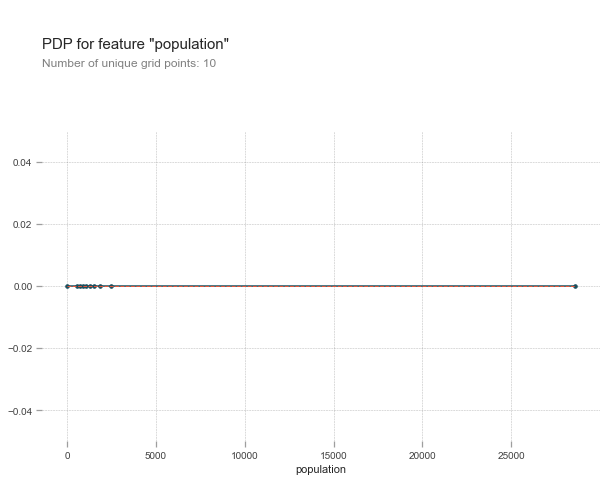

In [64]:
partial_dependence_plot(model=model, dataset=X_test, model_features=X_train.columns, objective='population')

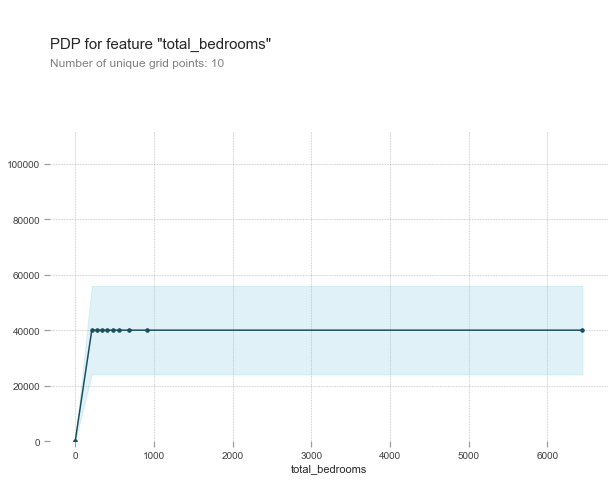

In [65]:
partial_dependence_plot(model=model, dataset=X_test, model_features=X_train.columns, objective='total_bedrooms')
